In [ ]:
# Set the working directory to the parent directory
import sys
sys.path.append('..')
sys.dont_write_bytecode = True

# Import relevant packages
from src.eda import data_info
from src.models import AutoencoderTrainer, AnomalyDetector, HybridLoss, AutoencoderTuner
import pandas as pd
import warnings
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from datetime import datetime

# Config
pd.set_option('display.max_columns', None) # Ensure all columns are displayed
warnings.filterwarnings("ignore")

In [3]:
import gc
import psutil
import os

gc.collect()
print(f"Memory: {psutil.Process(os.getpid()).memory_info().rss / 1024**2:.2f} MB")

Memory: 52.53 MB


In [39]:
x = """{'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': None, 'threshold': 0.1436689734458923} - 0.4862713887783526
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.05, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': None, 'threshold': 0.11708818972110747} - 0.48229208117787503
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': None, 'threshold': 0.6085953474044795} - 0.471461716937355
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': None, 'threshold': 0.35411708354949945} - 0.4771189812972543
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.25, 'dropout_rate': None, 'threshold': 0.17778273224830618} - 0.4687624353362515
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.0001, 'gamma': 0.3, 'dropout_rate': None, 'threshold': 0.34152468442916867} - 0.4731396736967768
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.01, 'gamma': 0.2, 'dropout_rate': None, 'threshold': 1.2014144897460937} - 0.4580183048149622
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.01, 'gamma': 0.3, 'dropout_rate': None, 'threshold': 2.3626476287841793} - 0.44965197215777264
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': 0.1, 'threshold': 0.11118310242891305} - 0.4882610425785913
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.05, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': 0.1, 'threshold': 0.13078859746456142} - 0.4988399071925754
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': 0.1, 'threshold': 0.5323553562164305} - 0.47672105053720654
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': 0.1, 'threshold': 0.19281654357910155} - 0.471150019896538
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.25, 'dropout_rate': 0.1, 'threshold': 0.13787918984889982} - 0.46987112504353884
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.0001, 'gamma': 0.3, 'dropout_rate': 0.1, 'threshold': 0.33543257713317864} - 0.45986078886310905
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.01, 'gamma': 0.2, 'dropout_rate': 0.1, 'threshold': 1.809257006645202} - 0.45382830626450116
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.01, 'gamma': 0.3, 'dropout_rate': 0.1, 'threshold': 3.1338717937469474} - 0.4519721577726218
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': 0.2, 'threshold': 0.15013233125209807} - 0.47335423197492166
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.05, 'lam': 0.0001, 'gamma': 0.2, 'dropout_rate': 0.2, 'threshold': 0.1469660639762878} - 0.4950258654994031
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': 0.2, 'threshold': 0.4559679627418512} - 0.4547563805104408
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.3, 'dropout_rate': 0.2, 'threshold': 0.32548357248306276} - 0.4564265817747712
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.001, 'gamma': 0.25, 'dropout_rate': 0.2, 'threshold': 0.4146314859390259} - 0.45568445475638053
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.0001, 'gamma': 0.3, 'dropout_rate': 0.2, 'threshold': 0.18144038915634153} - 0.46916036609629924
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.02, 'lam': 0.01, 'gamma': 0.2, 'dropout_rate': 0.2, 'threshold': 2.4409913539886463} - 0.44965197215777264
		 {'hidden_dims': [64], 'batch_size': 64, 'learning_rate': 0.1, 'lam': 0.01, 'gamma': 0.3, 'dropout_rate': 0.2, 'threshold': 1.9545942306518551} - 0.45085555113410264"""

In [40]:
a = [float(m.split("-")[-1].strip()) for m in x.split("\n")][:8]
b = [float(m.split("-")[-1].strip()) for m in x.split("\n")][8:16]
c = [float(m.split("-")[-1].strip()) for m in x.split("\n")][16:]

/var/folders/06/p2395lk55lq23v58ccqg66w40000gn/T/ipykernel_41522/1604223936.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([a, b, c], labels=["a", "b", "c"])


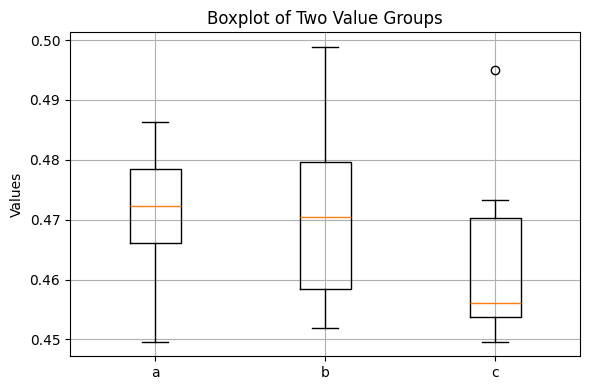

In [41]:
import matplotlib.pyplot as plt
# Plot boxplot
plt.figure(figsize=(6, 4))
plt.boxplot([a, b, c], labels=["a", "b", "c"])
plt.title("Boxplot of Two Value Groups")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
from scipy.stats import trim_mean

for l in [a, b, c]:
    print(trim_mean(l, proportiontocut=0.1))

0.470839569274575
0.47131304976858523
0.4631144254880115


In [2]:
2*3*3*4*4

288